In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\vinee\Downloads\haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

<AxesSubplot:>

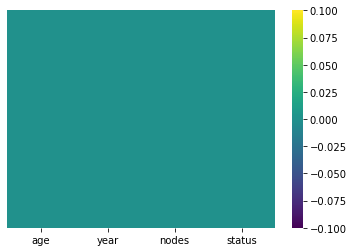

In [4]:
# To check for NULL values inside the data
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

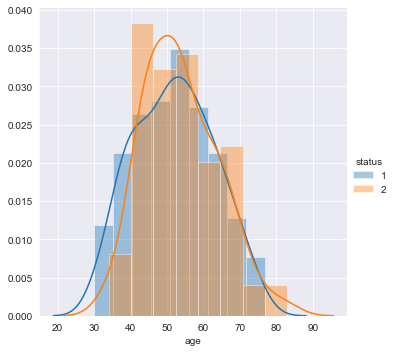

In [5]:
sns.set_style('darkgrid')
sns.FacetGrid(df,hue='status',size=5).map(sns.distplot,'age').add_legend()

#### Here, we can observe that both the plots are completely overlapped. It is observed that people in the age group 30-34 always survived and people in age group above 75 did not survive more than 5 years after operation. For most of observations, we can not predict the survival based on the age only.

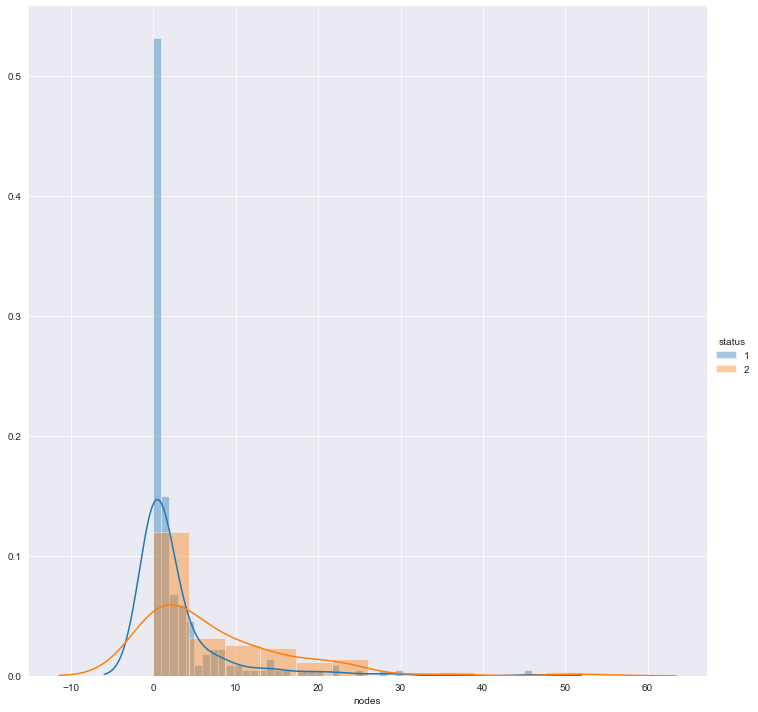

In [6]:
sns.set_style('darkgrid')
sns.FacetGrid(df,hue='status',size=10).map(sns.distplot,'nodes').add_legend()

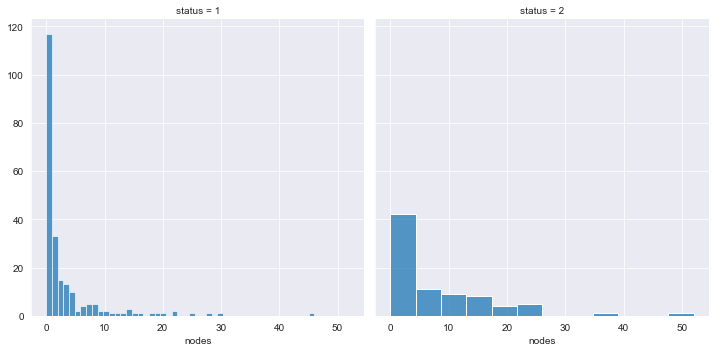

In [7]:
sns.set_style('darkgrid')
sns.FacetGrid(df,col='status',size=5).map(sns.histplot,'nodes').add_legend()

#### It is observed that mostly people with 0 nodes survived. But there is no strong evidence from the plots to classify people whether they will survive or not based on number of nodes only. As the number of nodes are increasing, the count of people who survived is decreasing more than the people who did not survived. So we can say that there is more chance of not surviving if there are more number of nodes. If the nodes are greater than 0 and less than 10, then there is almost 50-50 chance of survival and not survival.

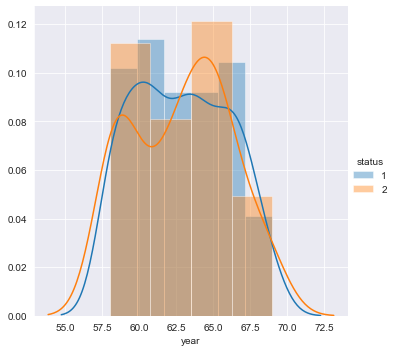

In [8]:
sns.set_style('darkgrid')
sns.FacetGrid(df,hue='status',size=5).map(sns.distplot,'year').add_legend()

#### We can observe that there are more succesful surgeries in the year 1958-1962 and more unsuccesful in year 1963 to 1968

In [9]:
# df_1 = data of patients who had survived
# df_2 = data of patients who hadn't survived

df_1 = df[df['status']==1]
df_2 = df[df['status']==2]
print('DF-1:\n',df_1.describe())
print()
print('DF-2:\n',df_2.describe())

DF-1:
               age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0

DF-2:
              age       year      nodes  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65.000000  11.000000     2.0
max    83.000000  69.000000  52.000000     2.0


Text(0.5, 1.0, 'Patients who survived')

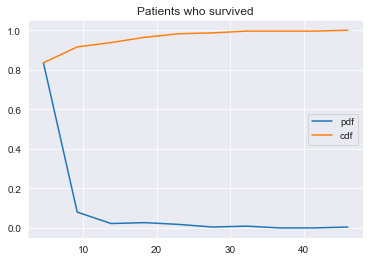

In [10]:
count, bin_edges = np.histogram(df_1['nodes'], bins=10, density=True)
pdf = count/count.sum()
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf')
plt.plot(bin_edges[1:],cdf, label='cdf')
plt.legend()
plt.title('Patients who survived')

#### We can say that around 82% patients who survived has less than 10 nodes.

Text(0.5, 1.0, "Patients who don't survived")

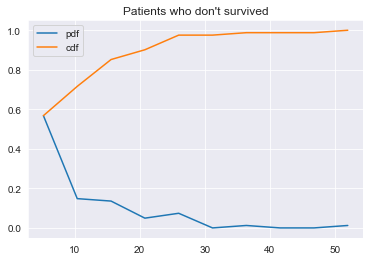

In [11]:
count, bin_edges = np.histogram(df_2['nodes'], bins=10, density=True)
pdf = count/count.sum()
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf')
plt.plot(bin_edges[1:],cdf, label='cdf')
plt.legend()
plt.title("Patients who don't survived")

#### We can say that around 65% of people who can't survive have less than 10 nodes.

<AxesSubplot:xlabel='status', ylabel='nodes'>

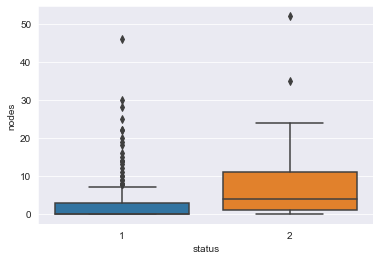

In [12]:
sns.boxplot(x='status',y='nodes',data=df)

#### The box plot shows that there are a lot of outliers in the data of survived class(class=1) due to which there is a lot of noise in the data. So we will prefer median instead of mean and median absolute deviation instead of standard deviation.

<AxesSubplot:xlabel='status', ylabel='nodes'>

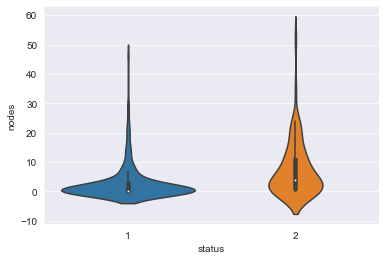

In [12]:
sns.violinplot(x='status',y='nodes',data = df)

In [13]:
print('Median nodes of Class 1: ',np.median(df_1['nodes']))
print('Median nodes of Class 2: ',np.median(df_2['nodes']))

Median nodes of Class 1:  0.0
Median nodes of Class 2:  4.0


In [14]:
from statsmodels import robust
print('Median absolute deviation of Class 1 nodes:',robust.mad(df_1['nodes']))
print('Median absolute deviation of Class 2 nodes:',robust.mad(df_2['nodes']))

Median absolute deviation of Class 1 nodes: 0.0
Median absolute deviation of Class 2 nodes: 5.930408874022408


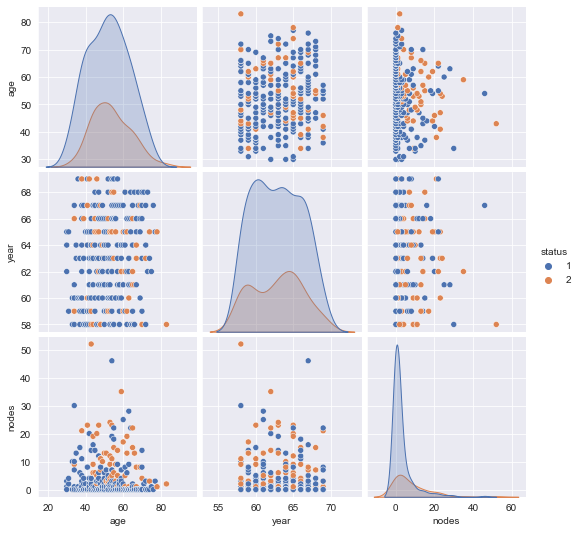

In [15]:
sns.pairplot(df,hue='status',palette='deep')

## OBSERVATIONS:
###  From box plot and violin plot:
####      There are a large amount of outliers in the data. 
###  From Pair plot:
####       We found out that "NODES" is the most important feature out of all the given features.
###  From PDF and CDF:
####    1. From the people who had survived, 52% had  0 nodes.
####    2. From people who had survived, 82% has less than 4 nodes.
####    3. From people who hadn't survived, 23% had 0 nodes.

###  We can conclude that the chances of survival are inversely proportional to number of nodes. Less the number of nodes, more the chance of survival and vice-versa.